In [1]:
# Зависимости
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree

from sklearn.metrics import mean_squared_error, f1_score

from sklearn.datasets import load_iris
from sklearn import tree

In [2]:
# Генерируем уникальный seed
my_code = "Маматбеков"
seed_limit = 2 ** 32
my_seed = int.from_bytes(my_code.encode(), "little") % seed_limit

In [4]:
# Читаем данные из файла
example_data = pd.read_csv("../datasets/Fish.csv")

In [5]:
example_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [6]:
# Определим размер валидационной и тестовой выборок
val_test_size = round(0.2*len(example_data))
print(val_test_size)

32


In [7]:
# Создадим обучающую, валидационную и тестовую выборки
random_state = my_seed
train_val, test = train_test_split(example_data, test_size=val_test_size, random_state=random_state)
train, val = train_test_split(train_val, test_size=val_test_size, random_state=random_state)
print(len(train), len(val), len(test))

95 32 32


In [8]:
# Значения в числовых столбцах преобразуем к отрезку [0,1].
# Для настройки скалировщика используем только обучающую выборку.
num_columns = ['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

ct = ColumnTransformer(transformers=[('numerical', MinMaxScaler(), num_columns)], remainder='passthrough')
ct.fit(train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical', MinMaxScaler(),
                                 ['Weight', 'Length1', 'Length2', 'Length3',
                                  'Height', 'Width'])])

In [9]:
# Преобразуем значения, тип данных приводим к DataFrame
sc_train = pd.DataFrame(ct.transform(train))
sc_test = pd.DataFrame(ct.transform(test))
sc_val = pd.DataFrame(ct.transform(val))

In [10]:
# Устанавливаем названия столбцов
column_names = num_columns + ['Species']
sc_train.columns = column_names
sc_test.columns = column_names
sc_val.columns = column_names

In [11]:
sc_train

,Weight,Length1,Length2,Length3,Height,Width,Species
0,0.272727,0.374757,0.387273,0.4375,0.72599,0.540351,Bream
1,0.0,0.223301,0.22,0.236486,0.290225,0.315031,Roach
2,0.606061,0.578641,0.574545,0.586149,0.649661,0.768789,Whitefish
3,0.206061,0.318447,0.329091,0.376689,0.651116,0.507278,Bream
4,0.090909,0.252427,0.256364,0.256757,0.309594,0.353981,Perch
...,...,...,...,...,...,...,...
90,0.578788,0.533981,0.547273,0.594595,1.0,0.735472,Bream
91,0.666667,0.63301,0.629091,0.619932,0.659352,0.896262,Perch
92,0.484848,0.508738,0.509091,0.52027,0.613417,0.775738,Whitefish
93,0.084848,0.262136,0.256364,0.273649,0.294798,0.311227,Roach


In [12]:
# Задание №1 - анализ деревьев принятия решений в задаче регрессии
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
# criterion : {“mse”, “friedman_mse”, “mae”, “poisson”}, default=”mse”
# splitter : {“best”, “random”}, default=”best”
# max_depth : int, default=None
# min_samples_split : int or float, default=2
# min_samples_leaf : int or float, default=1

In [13]:
# Выбираем 4 числовых переменных, три их них будут предикторами, одна - зависимой переменной
n = 4
labels = random.sample(num_columns, n)

y_label = labels[0]
x_labels = labels[1:]

print(x_labels)
print(y_label)

['Width', 'Length3', 'Weight']
Length1


In [14]:
# Отберем необходимые параметры
x_train = sc_train[x_labels]
x_test = sc_test[x_labels]
x_val = sc_val[x_labels]

y_train = sc_train[y_label]
y_test = sc_test[y_label]
y_val = sc_val[y_label]

In [15]:
x_train

,Width,Length3,Weight
0,0.540351,0.4375,0.272727
1,0.315031,0.236486,0.0
2,0.768789,0.586149,0.606061
3,0.507278,0.376689,0.206061
4,0.353981,0.256757,0.090909
...,...,...,...
90,0.735472,0.594595,0.578788
91,0.896262,0.619932,0.666667
92,0.775738,0.52027,0.484848
93,0.311227,0.273649,0.084848


In [33]:
# Создайте 4 модели с различными критериями ветвления criterion: 'mse', 'friedman_mse', 'mae', 'poisson'.
# Решите получившуюся задачу регрессии с помощью созданных моделей и сравните их эффективность.
# При необходимости применяйте параметры splitter, max_depth, min_samples_split, min_samples_leaf
# Укажите, какая модель решает задачу лучше других.
r_model1 = DecisionTreeRegressor(criterion='mse', splitter='random', max_depth=2, min_samples_split=4, min_samples_leaf=0.5)
r_model2 = DecisionTreeRegressor(criterion='friedman_mse', splitter='best', max_depth=3, min_samples_split=4, min_samples_leaf=0.5)
r_model3 = DecisionTreeRegressor(criterion='mae')
r_model4 = DecisionTreeRegressor(criterion='poisson', splitter='random', max_depth=1, min_samples_split=2, min_samples_leaf=1)

In [34]:
r_models = []
r_models.append(r_model1)
r_models.append(r_model2)
r_models.append(r_model3)
r_models.append(r_model4)

In [35]:
# Обучаем модели
for model in r_models:
    model.fit(x_train, y_train)

In [36]:
# Оценииваем качество работы моделей на валидационной выборке
mses = []
for model in r_models:
    val_pred = model.predict(x_val)
    mse = mean_squared_error(y_val, val_pred)
    mses.append(mse)
    print(mse)

0.031608795111765495
0.031608795111765495
0.0013482656235271938
0.031185189174879398


In [37]:
# Выбираем лучшую модель
i_min = mses.index(min(mses))
best_r_model = r_models[i_min]
best_r_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mae',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [38]:
# Вычислим ошибку лучшей модели на тестовой выборке.
test_pred = best_r_model.predict(x_test)
mse = mean_squared_error(y_test, test_pred)
print(mse)

0.0014533650673956072


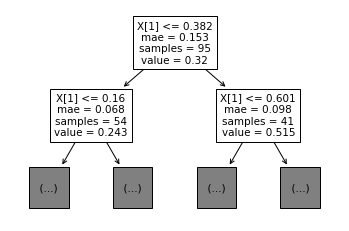

In [39]:
# Вывод на экран дерева tree.
# max_depth - максимальная губина отображения, по умолчанию выводится дерево целиком.
plot_tree(best_r_model, max_depth=1)
plt.show()

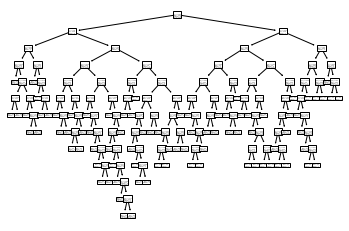

In [40]:
plot_tree(best_r_model)
plt.show()

In [41]:
# Задание №2 - анализ деревьев принятия решений в задаче классификации
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# criterion : {“gini”, “entropy”}, default=”gini”
# splitter : {“best”, “random”}, default=”best”
# max_depth : int, default=None
# min_samples_split : int or float, default=2
# min_samples_leaf : int or float, default=1

In [42]:
# Выбираем 2 числовых переменных, которые будут параметрами элементов набора данных
# Метка класса всегда 'Species'
n = 2
x_labels = random.sample(num_columns, n)
y_label = 'Species'

print(x_labels)
print(y_label)

['Width', 'Length2']
Species


In [43]:
# Отберем необходимые параметры
x_train = sc_train[x_labels]
x_test = sc_test[x_labels]
x_val = sc_val[x_labels]

y_train = sc_train[y_label]
y_test = sc_test[y_label]
y_val = sc_val[y_label]

In [44]:
x_train

,Width,Length2
0,0.540351,0.387273
1,0.315031,0.22
2,0.768789,0.574545
3,0.507278,0.329091
4,0.353981,0.256364
...,...,...
90,0.735472,0.547273
91,0.896262,0.629091
92,0.775738,0.509091
93,0.311227,0.256364


In [45]:
# Создайте 4 модели с различными критериями ветвления criterion : 'gini', 'entropy' и splitter : 'best', 'random'.
# Решите получившуюся задачу классификации с помощью созданных моделей и сравните их эффективность.
# При необходимости применяйте параметры max_depth, min_samples_split, min_samples_leaf
# Укажите, какая модель решает задачу лучше других.
d_model1 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=2, min_samples_split=3, min_samples_leaf=1)
d_model2 = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=1, min_samples_split=4, min_samples_leaf=2)
d_model3 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=1, min_samples_split=2, min_samples_leaf=2)
d_model4 = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=2, min_samples_split=5, min_samples_leaf=1)

In [46]:
d_models = []
d_models.append(d_model1)
d_models.append(d_model2)
d_models.append(d_model3)
d_models.append(d_model4)

In [47]:
# Обучаем модели
for model in d_models:
    model.fit(x_train, y_train)

In [48]:
# Оценииваем качество работы моделей на валидационной выборке.
f1s = []
for model in d_models:
    val_pred = model.predict(x_val)
    f1 = f1_score(y_val, val_pred, average='weighted')
    f1s.append(f1)
    print(f1)

0.5234375
0.12347560975609756
0.3341454272863568
0.5338021778584392


In [50]:
# Выбираем лучшую модель
i_max = f1s.index(max(f1s))
best_d_model = d_models[i_max]
best_d_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'random'}

In [51]:
# Вычислим ошибку лучшей модели на тестовой выборке.
test_pred = best_d_model.predict(x_test)
f1 = f1_score(y_test, test_pred, average='weighted')
print(f1)

0.39180871212121215


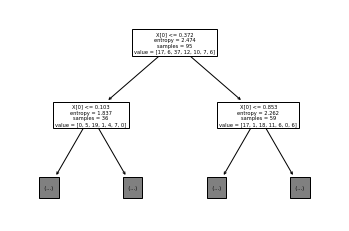

In [52]:
# Вывод на экран дерева tree.
# max_depth - максимальная губина отображения, по умолчанию выводится дерево целиком.
plot_tree(best_d_model, max_depth=1)
plt.show()

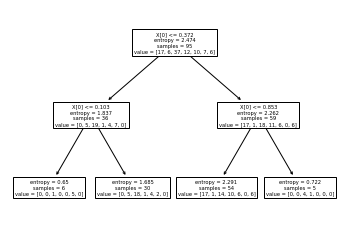

In [53]:
plot_tree(best_d_model)
plt.show()